# Курсовой проект для курса "Алгоритмы анализа данных"

**Задание:** предсказать вероятность того, подойдет ли репетитор для подготовки к экзамену по математике. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

**Целевая переменная:** choose

**Метрика:** ROC AUC

**Описание датасета:**

* **Id** - идентификационный номер
* **age** - возраст репетитора
* **years_of_experience** - стаж преподавания
* **lesson_price** - цена за урок
* **qualification** - квалификация
* **physics** - физика
* **chemistry** - химия
* **biology** - биология
* **english** - ангийский
* **geography** - география
* **history** - история
* **mean_exam_points** - средний балл за экзамен

**План курсового проекта:**
* [I. Загрузка библиотек и функций](#1)
* [II. Чтение данных](#2)
* [III. Исследование данных](#3)
* [IV. Масштабирование данных](#4)
* [V. Модель предсказания целевой переменной](#5)
* [VI. Оценка качества классификации](#6)
* [VII. Предсказание и сохранение финальных данных](#7)

## I. Загрузка библиотек и функций <a class='anchor' id='1'>

In [1]:
# Основные библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Разбивает выборку на обучающую и тестовую
from sklearn.model_selection import train_test_split

from imblearn import over_sampling, under_sampling

# Cборщик мусора
import gc 

## II. Чтение данных <a class='anchor' id='2'>

In [74]:
del df
del fdf
gc.collect()

5536

In [75]:
df = pd.read_csv('train.csv')
fdf = pd.read_csv('test.csv')

## III. Исследование данных <a class='anchor' id='3'>

In [76]:
# Проверка типов данных train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [77]:
# Проверка типов данных test
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


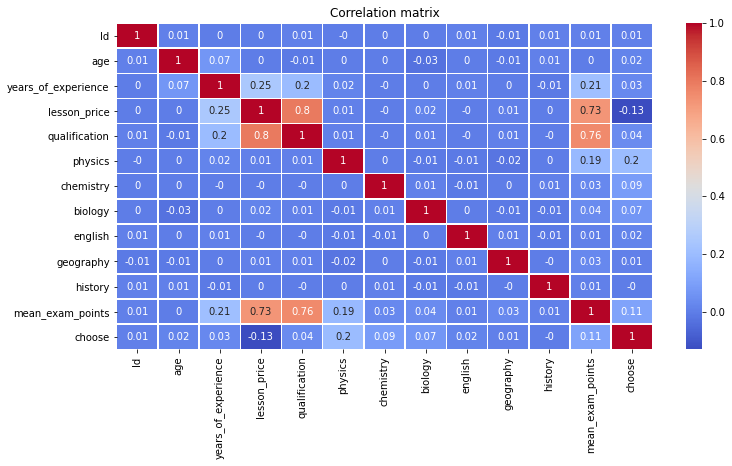

In [78]:
plt.figure(figsize = (12,6))

sns.plotting_context(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
# corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [8]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [9]:
fdf.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


### age

In [10]:
df.age.sort_values().unique()

array([23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61.,
       62., 63., 64., 65., 66., 67., 68.])

In [10]:
fdf.age.sort_values().unique()

array([23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61.,
       62., 63., 64., 65., 66., 67., 68.])

### years_of_experience

In [15]:
df.years_of_experience.sort_values().unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [16]:
fdf.years_of_experience.sort_values().unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

### lesson_price

In [14]:
df.lesson_price.sort_values().unique()

array([ 200.,  350.,  400.,  450.,  500.,  550.,  600.,  650.,  700.,
        750.,  800.,  850.,  900.,  950., 1000., 1050., 1100., 1150.,
       1200., 1250., 1300., 1350., 1400., 1450., 1500., 1550., 1600.,
       1650., 1700., 1750., 1800., 1850., 1900., 1950., 2000., 2050.,
       2100., 2150., 2200., 2250., 2300., 2350., 2400., 2450., 2500.,
       2550., 2600., 2650., 2700., 2750., 2800., 2850., 2900., 2950.,
       3000., 3050., 3100., 3150., 3200., 3250., 3300., 3350., 3400.,
       3450., 3500., 3550., 3600., 3650., 3700., 3750., 3950.])

In [16]:
fdf.lesson_price.sort_values().unique()

array([ 300.,  350.,  400.,  450.,  500.,  550.,  600.,  650.,  700.,
        750.,  800.,  850.,  900.,  950., 1000., 1050., 1100., 1150.,
       1200., 1250., 1300., 1350., 1400., 1450., 1500., 1550., 1600.,
       1650., 1700., 1750., 1800., 1850., 1900., 1950., 2000., 2050.,
       2100., 2150., 2200., 2250., 2300., 2350., 2400., 2450., 2500.,
       2550., 2600., 2650., 2700., 2750., 2800., 2850., 2900., 2950.,
       3000., 3050., 3100., 3150., 3200., 3250., 3300., 3350., 3400.,
       3450., 3500., 3550., 3600., 3650., 3700., 3750., 3800., 3850.,
       3950.])

In [18]:
df.qualification.sort_values().unique(), fdf.qualification.sort_values().unique()

(array([1., 2., 3., 4.]), array([1., 2., 3., 4.]))

In [19]:
df.physics.sort_values().unique(), fdf.physics.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

In [20]:
df.chemistry.sort_values().unique(), fdf.chemistry.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

In [21]:
df.biology.sort_values().unique(), fdf.biology.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

In [22]:
df.english.sort_values().unique(), fdf.english.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

In [23]:
df.geography.sort_values().unique(), fdf.geography.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

In [24]:
df.history.sort_values().unique(), fdf.history.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

### mean_exam_points

In [79]:
df.mean_exam_points.sort_values().unique()

array([ 33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [26]:
fdf.mean_exam_points.sort_values().unique()

array([32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
       45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83.,
       84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96.,
       97., 98.])

## IV. Масштабирование данных <a class='anchor' id='4'>

In [80]:
def standard_scale(x):
    mean = x.mean(axis=0)
    std = x.std(axis=0)
    return (x - mean) / std

In [81]:
lst = ['Id', 'chemistry', 'biology', 'english', 'geography', 'history', 'choose'] #'physics',
# lst = ['Id', 'choose']
X = np.array(df.drop(lst, axis=1))
y = np.array(df['choose'])
ind = np.array(df['Id'])

lst_f = ['Id', 'chemistry', 'biology', 'english', 'geography', 'history'] # 'physics',
# lst_f = ['Id']
X_f = np.array(fdf.drop(lst_f, axis=1))
ind_f = np.array(fdf[['Id']])

In [82]:
X_st = X.copy()
X_st = standard_scale(X_st)
X_st

array([[-1.34508978, -1.11773006,  0.85450883,  0.34514053, -0.76734265,
         0.7035867 ],
       [ 0.77200475,  0.01426311, -0.86382602,  0.34514053,  1.30319877,
        -0.54693332],
       [-2.09229961,  0.5802597 ,  0.09080445, -0.90672937,  1.30319877,
         0.11510669],
       ...,
       [-0.22427503,  1.71225287,  0.09080445, -0.90672937, -0.76734265,
        -0.39981332],
       [-0.59787995, -1.11773006, -0.0046586 ,  0.34514053,  1.30319877,
         0.5564667 ],
       [-0.59787995,  1.71225287, -0.95928907, -0.90672937, -0.76734265,
        -1.79745335]])

In [83]:
X_stf = X_f.copy()
X_stf = standard_scale(X_stf)
X_stf

array([[-1.73371969,  0.00807395,  1.90046712,  1.64348174, -0.76981185,
         1.90506341],
       [-1.36019396,  2.26652127,  0.19020064,  0.37702436,  1.29901871,
         0.50485588],
       [-0.23961676,  0.00807395, -0.94997702, -0.88943302, -0.76981185,
        -1.41121759],
       ...,
       [-0.23961676,  0.00807395, -0.85496222, -0.88943302,  1.29901871,
        -0.08470519],
       [ 0.63194329,  1.70190944, -1.33003624,  0.37702436,  1.29901871,
        -0.01101005],
       [-0.36412533, -1.12114971, -0.37988819, -0.88943302,  1.29901871,
        -1.70599812]])

## V. Модель предсказания целевой переменной <a class='anchor' id='5'>

In [84]:
# разбиваем датафреймы на тренировочные и валидационные
X_train, X_valid, y_train, y_valid = train_test_split(X_st, y, test_size=0.33, shuffle=True, random_state=19, stratify=y)

In [85]:
X_train.shape, X_valid.shape

((6700, 6), (3300, 6))

In [86]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [87]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [88]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations+1):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= eta * (1/n * X.T @ (y_pred - y))
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
            
    return W

In [89]:
%time
W = eval_model(X_train, y_train, iterations=1000, eta=0.1)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.48 µs
Iter: 0, weights: [ 0.4902733  -0.14216374  0.61635119  1.49373061 -0.22383237 -0.25269348], error 1.0996459217104226
Iter: 100, weights: [ 0.08169161 -0.0081173  -0.37783875  0.64171303  0.29129033 -0.26989632], error 0.6817652878534252
Iter: 200, weights: [ 0.02849635  0.05471902 -0.56510608  0.51926765  0.28747599  0.01580777], error 0.6669906348235635
Iter: 300, weights: [ 0.02110755  0.06678702 -0.65971147  0.45456383  0.25605727  0.17680198], error 0.6628155847275206
Iter: 400, weights: [ 0.01945366  0.0703641  -0.71078824  0.41676825  0.23623394  0.26848788], error 0.6614852242909723
Iter: 500, weights: [ 0.018801    0.07193361 -0.73896149  0.39426137  0.22488597  0.32109162], error 0.6610509605984475
Iter: 600, weights: [ 0.01845816  0.07274673 -0.75463903  0.38078049  0.21840086  0.3514327 ], error 0.6609071942453214
Iter: 700, weights: [ 0.0182627   0.07318653 -0.76338846  0.37267707  0.21466746  0.36899584],

In [90]:
def calc_pred(W, X, threshold):
    
    y_pred_proba = sigmoid(np.dot(X, W))
    y_pred = np.where(y_pred_proba > threshold, 1, 0)

    return y_pred

In [91]:
y_train[1:20]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [92]:
y_train_pred = calc_pred(W, X_train, 0.6)
y_train_pred[1:20]

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [93]:
y_valid[1:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [94]:
y_valid_pred = calc_pred(W, X_valid, 0.6)
y_valid_pred[1:20]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0])

## VI. Оценка качества классификации <a class='anchor' id='6'>

In [95]:
# TP  FP
# FN  TN

def matrix(y, y_pred):
    
    conf_matrix = np.zeros(shape=(2, 2))
    
    conf_matrix[0, 0] = np.sum(np.where(y == 1, y_pred == y, False)) # TP
    conf_matrix[1, 1] = np.sum(np.where(y == 0, y_pred == y, False)) # TN
    conf_matrix[1, 0] = np.sum(np.where(y == 1, y_pred != y, False)) # FN
    conf_matrix[0, 1] = np.sum(np.where(y == 0, y_pred != y, False)) # FP
    
    return conf_matrix

In [96]:
matrix(y_train, y_train_pred)

array([[ 501., 1031.],
       [ 242., 4926.]])

In [97]:
matrix(y_valid, y_valid_pred)

array([[ 244.,  520.],
       [ 122., 2414.]])

In [98]:
def TPR(X, y, y_pred, threshold):
    
    TPR = []
    
    for i in range(len(threshold)):
        mtx = matrix(y, calc_pred(W, X, threshold[i]))
        TP = mtx[0, 0] 
        FN = mtx[1, 0]
        tpr = (TP/(TP + FN))
        TPR.append(tpr)
    
    return TPR

In [99]:
def FPR(X, y, y_pred, threshold):
    
    FPR = []
    
    for i in range(len(threshold)):
        mtx = matrix(y, calc_pred(W, X, threshold[i]))
        FP = mtx[0, 1] 
        TN = mtx[1, 1]
        ftp = (FP/(FP+TN))
        FPR.append(ftp)

    return FPR

In [100]:
threshold = np.round(np.linspace(0, 1, 11), 1)
threshold

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [101]:
FPR_t = FPR(X_train, y_train, y_train_pred, threshold)
TPR_t = TPR(X_train, y_train, y_train_pred, threshold)

AUC_ROC_t = -np.trapz(TPR_t, x = FPR_t, dx=0.1)
print(f'Показатели выборки X_train')
print(f'threshold = {threshold}')
print(f'FPR = {FPR_t}')
print(f'TPR = {TPR_t}')
print(f'AUC_ROC = {AUC_ROC_t}')

Показатели выборки X_train
threshold = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
FPR = [1.0, 0.9996642605338257, 0.9936209501426893, 0.9234514017122712, 0.7701863354037267, 0.4314252140339097, 0.17307369481282525, 0.022158804767500418, 0.0015108275977841195, 0.0, 0.0]
TPR = [1.0, 1.0, 1.0, 1.0, 0.9973082099596231, 0.9004037685060565, 0.6742934051144011, 0.23014804845222073, 0.04306864064602961, 0.004037685060565276, 0.0]
AUC_ROC = 0.8255587204033573


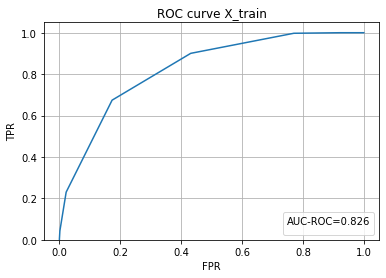

In [102]:
plt.title('ROC curve X_train')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC_t:.3f}', loc='lower right')
plt.plot(FPR_t, TPR_t);

In [103]:
FPR_v = FPR(X_valid, y_valid, y_valid_pred, threshold)
TPR_v = TPR(X_valid, y_valid, y_valid_pred, threshold)

AUC_ROC_v = -np.trapz(TPR_v, x = FPR_v, dx=0.1)
print(f'Показатели выборки X_valid')
print(f'threshold = {threshold}')
print(f'FPR = {FPR_v}')
print(f'TPR = {TPR_v}')
print(f'AUC_ROC = {AUC_ROC_v}')

Показатели выборки X_valid
threshold = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
FPR = [1.0, 1.0, 0.9952283571915473, 0.9294478527607362, 0.7777777777777778, 0.4485344239945467, 0.17723244717109748, 0.02419904567143831, 0.0010224948875255625, 0.0, 0.0]
TPR = [1.0, 1.0, 1.0, 1.0, 0.9918032786885246, 0.8989071038251366, 0.6666666666666666, 0.226775956284153, 0.03551912568306011, 0.00273224043715847, 0.0]
AUC_ROC = 0.8166465520131415


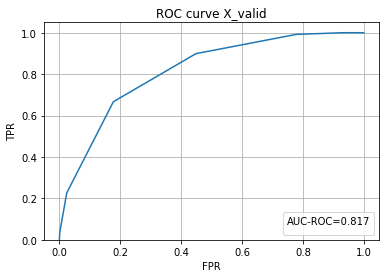

In [104]:
plt.title('ROC curve X_valid')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC_v:.3f}', loc='lower right')
plt.plot(FPR_v, TPR_v);

## VII. Предсказание и сохранение финальных данных <a class='anchor' id='7'>

In [106]:
y_pred = calc_pred(W, X_stf, 0.55)
final_df = pd.DataFrame({'Id':ind_f[:,0], 'choose':y_pred})
final_df.to_csv('predict.csv', index=False, encoding='utf-8')

In [107]:
final_df

,Id,choose
0,10000,0
1,10001,1
2,10002,0
3,10003,0
4,10004,1
...,...,...
9995,19995,1
9996,19996,0
9997,19997,1
9998,19998,1
